In [41]:
import seaborn as sns
from matplotlib import dates
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
# sns.set(font_scale=5.5)
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.5)
df_hrv = pd.read_csv("../data/original/HeartRateVariabilitySDNN.csv")
# df_hrv.head()

# df_new = pd.DataFrame(index=df_hrv.index)
# df_new['date'] = pd.to_datetime(df_hrv['creationDate'])
# df_new['hrv'] = df_hrv['value']
# new_date = []


# for (index, row) in df_new.iterrows():
#     new_date.append(np.datetime64('2005-02-25T03:30'))


# df_new['new date'] = new_date 
# df_new['new date'] = df_new['new date'].values.astype(float)  
# df_new.head()

# from pandas.plotting import autocorrelation_plot





In [101]:
from tabulate import tabulate

def parse_date(x):
    return pd.datetime.strptime(x[:-6],'%Y-%m-%d %H:%M:%S')

series = pd.read_csv('../data/original/HeartRateVariabilitySDNN.csv', header=0, index_col=5, parse_dates=[5], squeeze=True, date_parser=parse_date)

df_new = pd.DataFrame()
df_new['value'] = series['value'].resample('H').mean().interpolate()
df_new['creationDate'] = pd.to_datetime(df_new.index)
df_new = df_new.reset_index(drop=True)

df_new['t+1'] = df_new['value'].shift(periods=1)
# df_new['t+24'] = df_new['value'].shift(periods=24)
# df_new.head()

df_new2 = pd.DataFrame() 
df_new2['timestamp'] = df_new['creationDate']
df_new2['HRV (ms)'] = df_new['value']
df_new2['t+1'] = df_new['t+1']

# df_new2.reset_index()
df_new2.dropna().head()

# df_new2.set_index(df_new2['timestamp'])


# df_new2.dropna().describe()

# scaler = StandardScaler()

# df_new2_scaled = scaler.fit_transform(df_new2[['HRV (ms)', 't+1']].dropna())


# print(tabulate(df_new2_scaled.describe(), tablefmt="pipe", headers="keys"))










timestamp  HRV (ms)       t+1
1 2018-01-16 10:00:00  36.47938  38.75470
2 2018-01-16 11:00:00  34.20406  36.47938
3 2018-01-16 12:00:00  31.92874  34.20406
4 2018-01-16 13:00:00  29.65342  31.92874
5 2018-01-16 14:00:00  27.37810  29.65342

In [10]:
df_hrv_filtered = df_new

# convert from string to datetime
# df_hrv_filtered['creationDate'] = pd.to_datetime(df_hrv_filtered['creationDate'])
# mean per day
# df_hrv_final = df_hrv_filtered.groupby(df_hrv_filtered['creationDate'].dt.date).mean()

df_hrv_filtered.head()
    

value        creationDate       t+1  t+24
0  38.75470 2018-01-16 09:00:00       NaN   NaN
1  36.47938 2018-01-16 10:00:00  38.75470   NaN
2  34.20406 2018-01-16 11:00:00  36.47938   NaN
3  31.92874 2018-01-16 12:00:00  34.20406   NaN
4  29.65342 2018-01-16 13:00:00  31.92874   NaN

|       |             HRV |             IAW |             HOD |             DOW |              IM |            t+1 |
|:------|----------------:|----------------:|----------------:|----------------:|----------------:|---------------:|
| count | 15068           | 15068           | 15068           | 15068           | 15068           | 15068          |
| mean  |    -1.81078e-16 |    -2.18095e-17 |    -8.01648e-17 |    -3.53668e-18 |     1.23666e-16 |     9.0539e-17 |
| std   |     1.00003     |     1.00003     |     1.00003     |     1.00003     |     1.00003     |     1.00003    |
| min   |    -2.75339     |    -0.559363    |    -1.66104     |    -1.50388     |    -0.577452    |    -2.7493     |
| 25%   |    -0.642028    |    -0.559363    |    -0.938811    |    -1.00301     |    -0.577452    |    -0.64105    |
| 50%   |    -0.125696    |    -0.559363    |    -0.0721366   |    -0.00126315  |    -0.577452    |    -0.125708   |
| 75%   |     0.534439    |    -0.559363    |     0.938984    | 

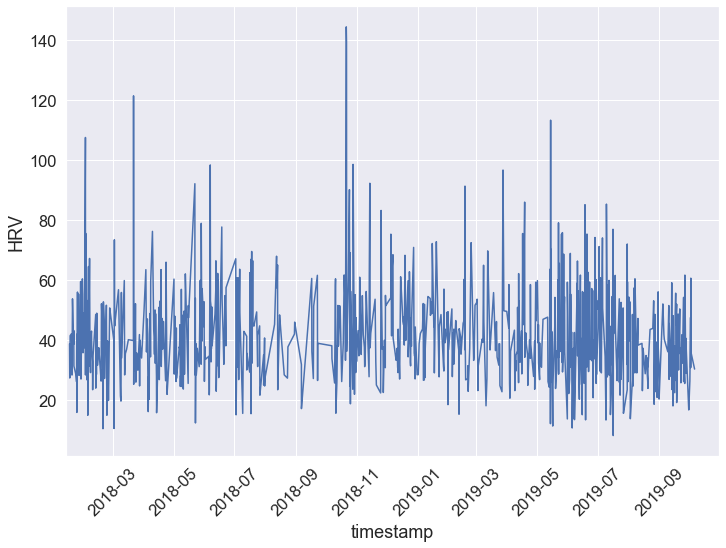

In [115]:
from tabulate import tabulate
scaler = StandardScaler()
hrv_merged = pd.DataFrame()

def at_work(row):
#     print(row['creationDate'].hour)
#     derp = row['creationDate'].hour
    hour = row['creationDate'].hour
    weekday = row['creationDate'].isoweekday()
    
    if((hour >= 9 and hour <17) and weekday < 6):
        # print(pd.to_datetime(row['creationDate']), (weekday))
        return 1
    return 0
    
# winter is from 1st of November to 1st of April
def is_winter(row):
    month = pd.to_datetime(row['creationDate'], format='%d/%m').month
    
    if(month >= 10 or month < 4):
        return 1
    return 0

def is_higher_than_mean(row):
    mean = 41.25
    if row.value > mean:
        return 1
    return 0

def get_hour_of_day(row):
    hour = pd.to_datetime(row['creationDate']).hour
    return hour

def get_day_of_week(row):
    weekday = pd.to_datetime(row['creationDate']).isoweekday()
    return weekday

def get_time_of_day(row):
    hour = pd.to_datetime(row['creationDate']).hour
    
    if((hour >= 6 and hour <12)):
        return 1
    return 0
    
    
hrv_merged['timestamp'] = df_hrv_filtered['creationDate']
hrv_merged['HRV'] = df_hrv_filtered['value']

work_hours = []
winter_time = []
above_mean = []
hour_of_day = []
day_of_week = []
time_of_day = [] # is morning or afternoon



for (index, row) in df_hrv_filtered.iterrows():

        
    work_hours.append(at_work(row))
#     winter_time.append(is_winter(row))
    above_mean.append(is_higher_than_mean(row))
    hour_of_day.append(get_hour_of_day(row))
    day_of_week.append(get_day_of_week(row))
    time_of_day.append(get_time_of_day(row))
    if (row['value'] > 150):
        df_hrv_filtered.drop(index, inplace=True)
    
hrv_merged['IAW'] = work_hours
# hrv_merged['Is Above Mean Value'] = above_mean
hrv_merged['HOD'] = hour_of_day
hrv_merged['DOW'] = day_of_week
hrv_merged['IM'] = time_of_day
# hrv_merged['new date'] = hrv_merged['date'].astype(np.int64).values.reshape(-1,1)
hrv_merged['t+1'] = df_hrv_filtered['t+1']

hrv_merged.to_csv('../data/hrv_shaped.csv')

# sns.heatmap(hrv_merged.corr(),
#             vmin=-1,
#             cmap='coolwarm',
#             annot=True);

hrv_merged.head()

hrv_merged.reset_index()
hrv_merged.set_index('timestamp')


hrv_copy = hrv_merged.set_index('timestamp')
hrv_scaled = scaler.fit_transform(hrv_copy.dropna())

# print(hrv_scaled.dropna())

hrv_new = pd.DataFrame(hrv_scaled)
# hrv_new.head()

# print(hrv_copy.columns)

hrv_new.columns = hrv_copy.columns

print(tabulate(hrv_new.describe(), tablefmt="pipe", headers="keys"))
# results.head()

# hrv_copy = hrv_merged.set_index('date')

# hrv_scaled = scaler.fit_transform(hrv_copy)
# # hrv_summary


sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.5)


sx = sns.lineplot(x=hrv_merged['timestamp'], y=hrv_merged['HRV'], data=hrv_merged)
sx.set(xlim = (pd.to_datetime('2018-01-13'), pd.to_datetime('2019-10-31')))

# sx.set_title('HRV', fontsize=20)

for item in sx.get_xticklabels():
    item.set_rotation(45)
# hrv_merged.hist()

# new_pd = pd.DataFrame(hrv_scaled)

# new_pd.head()
# hrv_merged = hrv_merged.set_index('date')
# hrv_scaled = scaler.fit_transform(hrv_copy)
# df_hrv_scaled = pd.DataFrame(hrv_scaled)
# df_hrv_scaled.head(50)

# hrv_copy.head(10)

fig = sx.get_figure()
fig.savefig("../report/images/dataset_3.png")


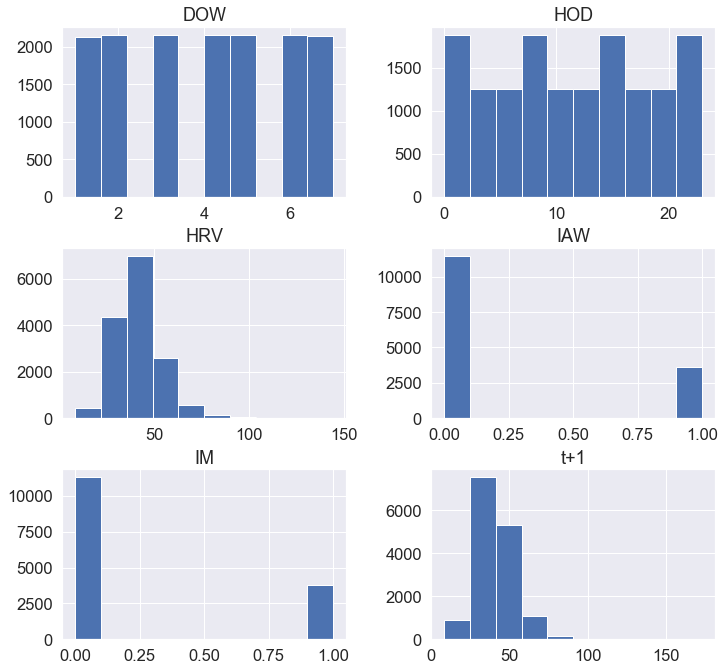

In [57]:
# hrv_merged['HRV (SDNN)'].hist()
# sns.distplot(hrv_merged['HRV'])
# plt.figure(figsize=(11,10))
cx = hrv_merged.hist(figsize=(11.7,11.27))
# fig = cx.get_figure()

plt.savefig("../report/images/ds2_hist.png")



# plt.figure(figsize=(1,10))

# fig.show()

# sns.distplot(data=hrv_merged)

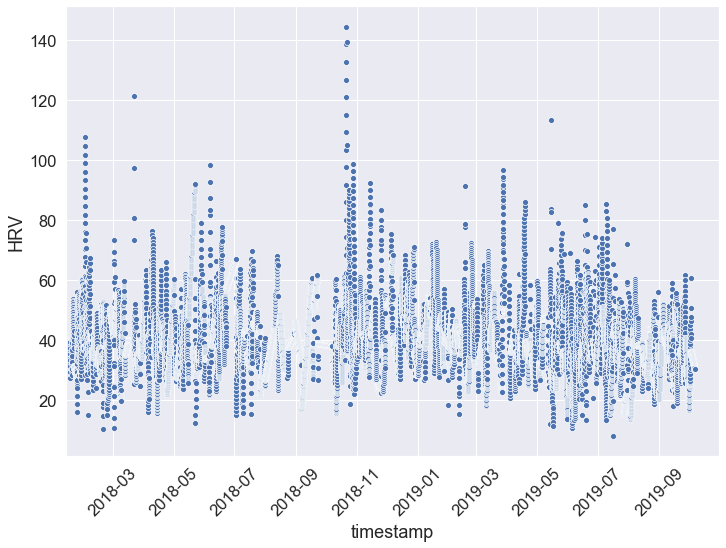

In [32]:
ax = sns.scatterplot(x=hrv_merged['timestamp'], y=hrv_merged['HRV'], data=hrv_merged)
ax.set(xlim = (pd.to_datetime('2018-01-13'), pd.to_datetime('2019-10-31')))
for item in ax.get_xticklabels():
    item.set_rotation(45)

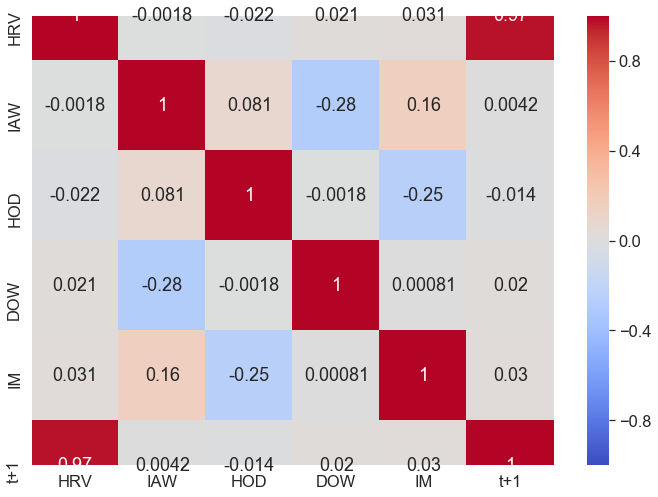

In [71]:
hrv_copy = hrv_merged.dropna().set_index('timestamp')

# print(hrv_copy.head())

hrv_scaled = scaler.fit_transform(hrv_copy)

df_hrv_scaled = pd.DataFrame(hrv_scaled)
df_hrv_scaled.columns = ['HRV', 'IAW', 'HOD', 'DOW', 'IM', 't+1']

# df_hrv_scaled.corr()

ix = sns.heatmap(df_hrv_scaled.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

fig = ix.get_figure()
fig.savefig("../report/images/ds2_corr.png")


# Linear regression

In [37]:
from sklearn import linear_model, model_selection, metrics, preprocessing
import numpy as np

1. Split test and train data sets
2. Determine alpha interval
3. Type cohercion

In [301]:
# stuff = hrv_merged['date'].astype(np.int64).values.reshape(-1,1)
# X = df_hrv_scaled['t+1'].values.reshape(-1,1)
X_raw = df_hrv_scaled[['HRV', 'HOD', 'IAW', 'DOW', 'IM']]

X = X_raw

# poly_features = preprocessing.PolynomialFeatures(degree=2)
# X = poly_features.fit_transform(X_raw)

y = df_hrv_scaled['t+1']

n_alphas = 100
alphas = np.logspace(-10, 10, n_alphas)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.20)

# print(X_train.shape, X_test.shape)
# print(y_train.shape, y_test.shape)
# print(X[500])


In [302]:
## Non-regularized linear regression
linreg = linear_model.LinearRegression().fit(X_train, y_train)
print('Score: ', linreg.score(X_test, y_test))

y_pred_linreg = linreg.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linreg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linreg)))

# plt.scatter(X_test, y_test,  color='gray')
# plt.plot(X_test, y_pred, color='red', linewidth=2)
# plt.show()

Score:  0.9424465077036147
Mean Squared Error: 0.06319743846682609
Root Mean Squared Error: 0.25139100713196977


## Regularized linear regression

In [303]:
ridgeCV = linear_model.RidgeCV(alphas=alphas, cv=10)
ridgeCV.fit(X_train,y_train)

print('score', ridgeCV.score(X_test, y_test))
print('coef', ridgeCV.coef_)
print('intercept', ridgeCV.intercept_)
print('alpha',ridgeCV.alpha_)

y_pred_ridge = ridgeCV.predict(X_test)

df_actual_vs_pred = []
df_actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge })
df_actual_vs_pred.head()

# sns.lineplot(data=df_actual_vs_pred)

# df_actual_vs_pred.describe()
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))


# df1 = df_actual_vs_pred.head(25)
# df1.plot(kind='bar',figsize=(16,10))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()


score 0.9424465077036123
coef [0.97160462 0.00737426 0.00469768 0.00159231 0.00098815]
intercept -0.0007447504800228931
alpha 1.0235310218990269e-09
Mean Squared Error: 0.06319743846682874
Root Mean Squared Error: 0.25139100713197504


rmse 0.25139100713197027
[array([0.97160462, 0.00737426, 0.00469768, 0.00159231, 0.00098815]), array([0.97160462, 0.00737426, 0.00469768, 0.00159231, 0.00098815]), array([0.97160462, 0.00737426, 0.00469768, 0.00159231, 0.00098815]), array([0.97160462, 0.00737426, 0.00469768, 0.00159231, 0.00098815]), array([0.97160462, 0.00737426, 0.00469768, 0.00159231, 0.00098815]), array([0.97160462, 0.00737426, 0.00469768, 0.00159231, 0.00098815]), array([0.97160462, 0.00737426, 0.00469768, 0.00159231, 0.00098815]), array([0.97160462, 0.00737426, 0.00469768, 0.00159231, 0.00098815]), array([0.97160462, 0.00737426, 0.00469768, 0.00159231, 0.00098815]), array([0.97160462, 0.00737426, 0.00469768, 0.00159231, 0.00098815]), array([0.97160462, 0.00737426, 0.00469768, 0.00159231, 0.00098815]), array([0.97160462, 0.00737426, 0.00469768, 0.00159231, 0.00098815]), array([0.97160462, 0.00737426, 0.00469768, 0.00159231, 0.00098815]), array([0.97160462, 0.00737426, 0.00469768, 0.00159231, 0.00098815]), array([0

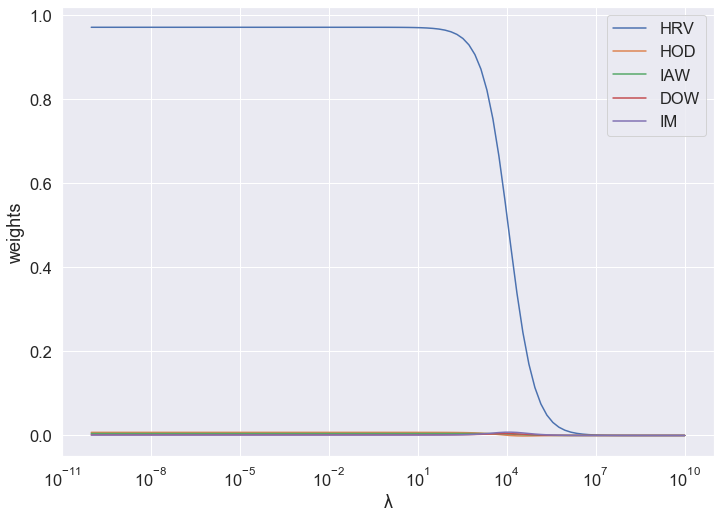

In [304]:
## NOTE: THESE VALUES HAVE TO BE SCALED

# print(X_test)

coefs = []
errors = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=True)
    ridge.fit(X_train, y_train)
    y_manual_ridge_pred = ridge.predict(X_test)
#     print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_manual_ridge_pred)), 'alpha', a)
    coefs.append(ridge.coef_)
    errors.append(np.sqrt(metrics.mean_squared_error(y_test, y_manual_ridge_pred)))
    

print('rmse', min(errors))
ax = plt.gca()

print(coefs)

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.legend(['HRV', 'HOD', 'IAW', 'DOW', 'IM'])
# ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('λ')
plt.ylabel('weights')
# plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
# plt.show()

plt.savefig("../report/images/coefficients_reg.png")

In [284]:
## NOTE: THESE VALUES SHOULD _NOT_ BE SCALED

# alphas = list(range(0, 10, 0.1))

# print(alphas)

coefs = []
error_train = []
error_test = []

for a in alphas:
#     print(a)
    model = linear_model.Ridge(alpha=a)
    model.fit(X_train,y_train)
    scores = model_selection.cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv = 10)
#     score_test = model_selection.cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv = 10)
#     score_test = model.score(X_test, y_test)
#     print(model.coef_)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
#     print(y_pred)
#     print(a, model.coef_.mean())
    error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    error_train.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    error_test.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
#     print(a, (np.sqrt(-scores).mean()), score_test)
    

df_errors = pd.DataFrame({'lambda': alphas, 'Training Error': error_train, 'Test Error': error_test})
df_errors.columns = ['lambda', 'Training Error', 'Test Error']  
df_errors = df_errors.set_index(-np.log10(alphas))
# df_errors = df_errors.set_index(alphas)


    

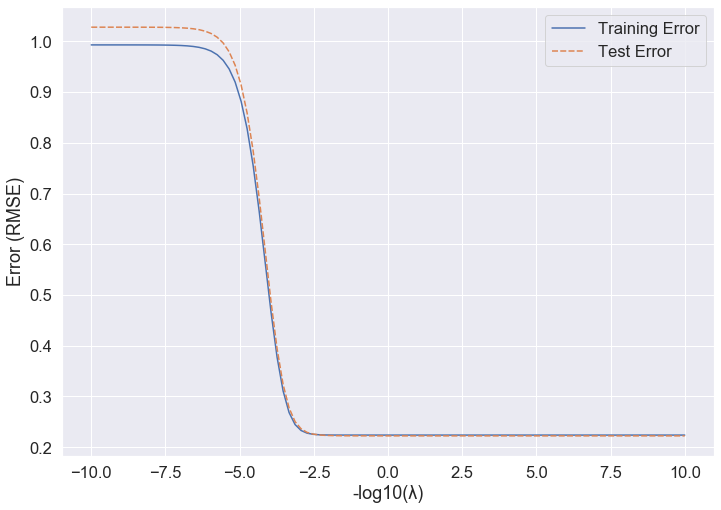

In [285]:
from matplotlib.colors import LogNorm

ex = sns.lineplot(data=df_errors[['Training Error', 'Test Error']])
# ex.set_title('Best Lambda selection')
ex.set(xlabel='-log10(λ)', ylabel='Error (RMSE)')

# import math

# print(math.exp(2.5))

# ex.set(xlim = (0,20))

plt.savefig("../report/images/error_reg.png")




## Test data set (predictions)

Mean Absolute Error: 0.08525303801301876
Mean Squared Error: 0.049428278712528334
Root Mean Squared Error: 0.22232471457876277


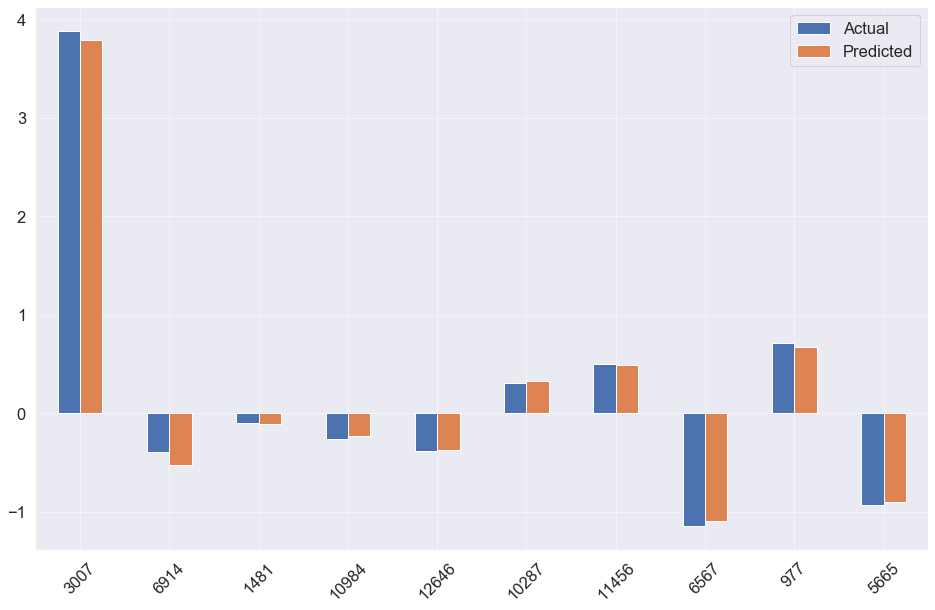

In [286]:
# y_pred = model.predict(X_test)

df_actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge.flatten() })
df_actual_vs_pred.head()

# print(y_pred_ridge)

# sns.lineplot(data=df_actual_vs_pred['Actual'])

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ridge))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ridge))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))



df1 = df_actual_vs_pred.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='white')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='green')

plt.xticks(rotation=45)
plt.savefig("../report/images/actual_vs_pred.png")

# df_actual_vs_pred.head(50)




In [233]:
# plt.scatter(X_train, y_train,  color='gray')
# plt.plot(X_train, y_pred, color='red', linewidth=2)
# plt.show()

In [234]:
# derp = linear_model.LassoCV(cv=10).fit(X_train, y_train)

# print(derp.alpha_)
# # Display results
# m_log_alphas = -np.log10(derp.alphas_)

# plt.figure()
# plt.plot(m_log_alphas, derp.mse_path_, '.')

## Kfolds

In [287]:
from sklearn import model_selection, linear_model, metrics, naive_bayes
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [288]:


# regularized linear regression
## USE SAME ALPHAS AS BEFORE

X = df_hrv_scaled

print(df_hrv_scaled)
print('@@@@@@')
print(df_hrv_scaled.values)


K=10
outerCV = model_selection.KFold(n_splits=K)
innerCV = model_selection.KFold(n_splits=K)

for outer_train_index, outer_test_index in outerCV.split(X, y):
    print(outer_train_index)
    break


            HRV       IAW       HOD       DOW        IM       t+1
0     -0.394288  1.787749 -0.216582 -1.003011  1.731744 -0.204286
1     -0.584178  1.787749 -0.072137 -1.003011  1.731744 -0.393880
2     -0.774069  1.787749  0.072309 -1.003011 -0.577452 -0.583475
3     -0.963959  1.787749  0.216755 -1.003011 -0.577452 -0.773069
4     -1.153850  1.787749  0.361201 -1.003011 -0.577452 -0.962663
...         ...       ...       ...       ...       ...       ...
15063 -0.884027 -0.559363 -0.794365  1.501358  1.731744 -0.877479
15064 -0.889411 -0.559363 -0.649920  1.501358  1.731744 -0.882855
15065 -0.894796 -0.559363 -0.505474  1.501358  1.731744 -0.888232
15066 -0.900181 -0.559363 -0.361028  1.501358  1.731744 -0.893608
15067 -0.905566 -0.559363 -0.216582  1.501358  1.731744 -0.898985

[15068 rows x 6 columns]
@@@@@@
[[-0.39428752  1.78774877 -0.21658235 -1.00301062  1.73174433 -0.20428611]
 [-0.58417805  1.78774877 -0.0721366  -1.00301062  1.73174433 -0.39388037]
 [-0.77406858  1.78774877

In [317]:
X = df_hrv_scaled.values

K=5
outerCV = model_selection.KFold(n_splits=K)
innerCV = model_selection.KFold(n_splits=K)

n_alphas = 100
alphas = np.logspace(-10, 10, n_alphas)

linear_regression_error = []

ridge_inner_error = []
min_ridge_error = 1

nn_inner_error = []
min_nn_error = 1

## table items

table_outer_fold = []
table_baseline_error = []
table_ridge_outer = []
table_nn_outer = []
table_nn_h = []
table_lambda = []

i=0
for outer_train_index, outer_test_index in outerCV.split(X, y):
    print('Crossvalidation fold: {0}/{1}'.format(i+1,K))
   
    i+=1
    
    table_outer_fold.append(i)
    
#     ridge_inner_error = []
#     min_ridge_error = 1
#     linear_regression_error = []
    
    
    # Outer folds
    X_train_outer, y_train_outer = X[outer_train_index,:], y[outer_train_index]
    X_test_outer, y_test_outer = X[outer_test_index,:], y[outer_test_index]
    
    # Inner folds
    ridge_inner_error = []
    min_ridge_error = 1
    linear_regression_error = []
    for inner_train_index, inner_test_index in outerCV.split(X_train_outer):
        X_train_inner, y_train_inner = X[inner_train_index,:], y[inner_train_index]
        X_test_inner, y_test_inner = X[inner_test_index,:], y[inner_test_index]
        
        # linear regression (no parameters to test)
        linreg = linear_model.LinearRegression().fit(X_train_inner, y_train_inner)
        y_pred_linreg = linreg.predict(X_test_inner)
        linear_regression_error.append(metrics.mean_squared_error(y_test_inner, y_pred_linreg))

        
        # regularized linear regression (alternate different lambdas)
        for a in alphas:
            ridge = linear_model.Ridge(alpha=a, fit_intercept=True)
            ridge.fit(X_train_inner, y_train_inner)
            y_pred_ridge = ridge.predict(X_test_inner)
            ridge_inner_error.append({
                'error': np.sqrt(metrics.mean_squared_error(y_test_inner, y_pred_ridge)),
                'alpha': a
            })
        
            
        for item in ridge_inner_error:
            if (item['error'] < min_ridge_error):
                min_ridge_error = item['error']
            if (item['error'] == min_ridge_error):
                min_ridge_alpha = item['alpha']
                
        # artificial neural network (alternate different hidden units)        
        for hidden_layer_number in range(j,11):
           
            model = keras.models.Sequential([
                keras.layers.Dense(hidden_layer_number, activation="relu", input_shape=X_train_inner.shape[1:]),
                keras.layers.Dense(1)
            ])

            model.compile(loss="mean_squared_error", optimizer="sgd")
            history = model.fit(np.asarray(X_train_inner), np.asarray(y_train_inner), verbose=0)
            mse_test = model.evaluate(np.asarray(X_test_inner), np.asarray(y_test_inner), verbose=0)
            nn_inner_error.append({
                'error': mse_test,
                'h': hidden_layer_number
            })
            
            
        for item in nn_inner_error:
            if (item['error'] < min_nn_error):
                min_nn_error = item['error']
            if (item['error'] == min_nn_error):
                min_nn_h = item['h']
                
                
    #### NOTE: NEED TO TRAIN IN THE OUTER MODEL WITH THE BEST PARAMETER OF THE INNER MODEL ####
    #### OUTER LAYER ####
    
    print('neural network ->', 'error:', min_nn_error, ', h:', min_nn_h)         
    print('baseline error:', min(linear_regression_error))           
    print('ridge ->', 'error:', min_ridge_error,', lambda', min_ridge_alpha)
    
    ## Baseline 
    linreg_outer = linear_model.LinearRegression().fit(X_train_outer, y_train_outer)
    y_pred_linreg_outer = linreg.predict(X_test_outer)
    table_baseline_error.append(metrics.mean_squared_error(y_test_outer, y_pred_linreg_outer))
    
    ## Linear regression
    ridge_outer = linear_model.Ridge(alpha=min_ridge_alpha, fit_intercept=True)
    ridge_outer.fit(X_train_outer, y_train_outer)
    y_pred_ridge_outer = ridge_outer.predict(X_test_outer)
    table_ridge_outer.append(np.sqrt(metrics.mean_squared_error(y_test_outer, y_pred_ridge_outer)))
    table_lambda.append(min_ridge_alpha)
    
    ## Neural network
    model_nn_outer = keras.models.Sequential([
                keras.layers.Dense(min_nn_h, activation="relu", input_shape=X_train_outer.shape[1:]),
                keras.layers.Dense(1)
            ])
    model_nn_outer.compile(loss="mean_squared_error", optimizer="sgd")
    mse_test_outer = model_nn_outer.evaluate(np.asarray(X_test_outer), np.asarray(y_test_outer), verbose=0)
    table_nn_outer.append(mse_test_outer)
    table_nn_h.append(min_nn_h)
    
    
                


Crossvalidation fold: 1/5
neural network -> error: 0.021448214368335362 , h: 4
baseline error: 4.336494988775048e-31
ridge -> error: 3.7455044676092495e-14 , lambda 1e-10
Crossvalidation fold: 2/5
neural network -> error: 0.01745530393025604 , h: 8
baseline error: 4.336494988775048e-31
ridge -> error: 3.7455044676092495e-14 , lambda 1e-10
Crossvalidation fold: 3/5
neural network -> error: 0.01745530393025604 , h: 8
baseline error: 4.336494988775048e-31
ridge -> error: 3.7455044676092495e-14 , lambda 1e-10
Crossvalidation fold: 4/5
neural network -> error: 0.01745530393025604 , h: 8
baseline error: 3.964145073309737e-31
ridge -> error: 2.516527706028922e-14 , lambda 1e-10
Crossvalidation fold: 5/5
neural network -> error: 0.017222442598924602 , h: 8
baseline error: 3.964145073309737e-31
ridge -> error: 2.516527706028922e-14 , lambda 1e-10


In [318]:
print('fold', table_outer_fold)
print('baseline error', table_baseline_error)
print('regression error', table_ridge_outer)
print('nn error', table_nn_outer)
print('nn layers', table_nn_h)
print('lambda', table_lambda)
    
    

fold [1, 2, 3, 4, 5]
baseline error [4.211670234282615e-31, 4.0978685733734115e-31, 3.8475680482923874e-31, 4.385662136761894e-31, 5.290981933416524e-31]
regression error [8.341404284912833e-14, 4.180331082526194e-14, 4.48634960631938e-14, 3.901871810987001e-14, 1.0578627048416205e-13]
nn error [2.1141185464650176, 2.3780022966017293, 3.221279454319265, 2.7756896516115925, 1.303325851038321]
nn layers [4, 8, 8, 8, 8]
lambda [1e-10, 1e-10, 1e-10, 1e-10, 1e-10]


In [319]:
df_final_table = pd.DataFrame()
df_final_table['Outer fold'] = table_outer_fold
df_final_table['Baseline error'] = table_baseline_error
df_final_table['Linear Regression error'] = table_ridge_outer
df_final_table['λ'] = table_lambda
df_final_table['ANN hidden units'] = table_nn_h
df_final_table['ANN error'] = table_nn_outer

df_final_table.head()

Outer fold  Baseline error  Linear Regression error             λ  \
0           1    4.211670e-31             8.341404e-14  1.000000e-10   
1           2    4.097869e-31             4.180331e-14  1.000000e-10   
2           3    3.847568e-31             4.486350e-14  1.000000e-10   
3           4    4.385662e-31             3.901872e-14  1.000000e-10   
4           5    5.290982e-31             1.057863e-13  1.000000e-10   

   ANN hidden units  ANN error  
0                 4   2.114119  
1                 8   2.378002  
2                 8   3.221279  
3                 8   2.775690  
4                 8   1.303326